In [1]:
from PTL.data_process import load_data, augment_data,combine_augmented_data
from PTL.model import build_vae
from PTL.utils import set_random_seeds, limit_threads,save_to_excel
from PTL.visualization import plot_latent_space, plot_scatter,plot_histogram_and_kde
import numpy as np


%load_ext autoreload
%autoreload 2

In [2]:
# 1. 设置随机种子和限制线程
set_random_seeds()  # 设置随机种子
limit_threads()  # 限制线程数

# 2. 加载数据
file_path = "data/raw/data_Cylind21.xlsx"
# file_path = ['data/data_Cylind21.xlsx', 'data/data_Pouch31.xlsx', 'data/data_Pouch52.xlsx']
data, Fts, SOC, SOE, SOH_values = load_data(
    file_path=file_path, sheet_name="All")


# 4. 构建VAE模型
vae, encoder, decoder = build_vae()

Epoch 1/2
1/1 [==============================] - 0s 226ms/step - loss: 2.3834
Epoch 2/2
4/4 [==============================] - 0s 532us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.3917
Epoch 2/2
4/4 [==============================] - 0s 696us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.2734
Epoch 2/2
4/4 [==============================] - 0s 512us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.3401
Epoch 2/2
4/4 [==============================] - 0s 594us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.2371
Epoch 2/2
4/4 [==============================] - 0s 481us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.2983
Epoch 2/2
4/4 [==============================] - 0s 674us/step
Epoch 1/2
1/1 [==============================] - 0s 2ms/step - loss: 2.3791
Epoch 2/2
4/4 [==============================] - 0s 487us/step
Epoch 1/2
1/1 [==========

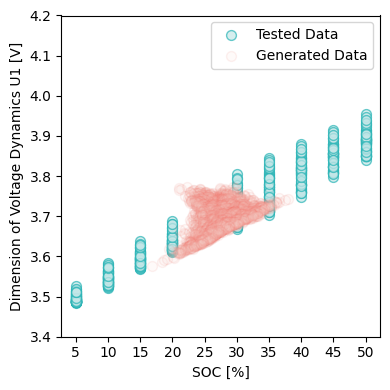

In [3]:
augmented_data, augmented_SOE_list, combined_data_normalized = augment_data(
    SOH_values, data, Fts, SOC, vae, encoder, decoder
)

# Encode the input data to obtain latent space values
encoded_data = encoder.predict(combined_data_normalized)

all_augmented_data = np.vstack(augmented_data)
augmented_SOE = np.concatenate(augmented_SOE_list)
augmented_SOC = all_augmented_data[:, 0]
augmented_Fts = all_augmented_data[:, 1:]

# 1. 数据可视化
plot_scatter(SOC, Fts, augmented_SOC, augmented_Fts)

21/21 [==============================] - 0s 355us/step


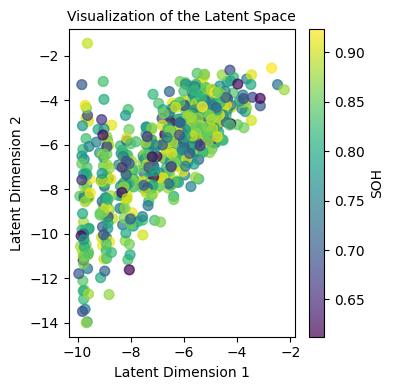

In [4]:
# Encode all data points
all_data_combined = np.hstack([SOC[:, np.newaxis], Fts])
all_encoded_data = encoder.predict(all_data_combined)
plot_latent_space(all_encoded_data, data)

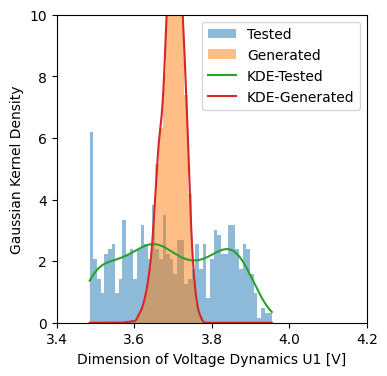

12.711145918007821

In [5]:
# output data
combined_df, augmented_df = combine_augmented_data(
    data, SOH_values, augmented_SOE, augmented_SOC, augmented_Fts
)

# Save the DataFrame to Excel
save_to_excel(combined_df, augmented_df)


# Select the first dimension (U1)
original_data = Fts[:, 0]
augmented_data = augmented_Fts[:, 0]
plot_histogram_and_kde(original_data, augmented_data, n_bins=50)